# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [48]:
#create base url and url variable
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build query 
query = f"{url}appid={weather_api_key}&units={units}&q="

record_number = 1

lat = []
lng = []
temp = []
max_temp = []
humid = []
cloud = []
wind_speed = []
found_city = []
country = []

print(f'Beginning Data Retrieval')
print(f'------------------------------')

for city in cities:

    try:
        city_data = (requests.get(query + city)).json()
        lat.append(city_data["coord"]["lat"])
        lng.append(city_data["coord"]["lon"])
        temp.append(city_data["main"]["temp"])
        max_temp.append(city_data["main"]["temp_max"])
        humid.append(city_data["main"]["humidity"])
        wind_speed.append(city_data["wind"]["speed"])
        cloud.append(city_data["clouds"]["all"])
        found_city.append(city_data["name"])
        country.append(city_data["sys"]["country"])
        print(f'Processing Record {record_number} | {city}')
        record_number = record_number + 1
    
    except KeyError:
        print(f'City not found. Skipping...')
  
print(f'------------------------------')
print(f'Data Retrieval Complete')
print(f'------------------------------')

Beginning Data Retrieval
------------------------------
Processing Record 1 | bluff
Processing Record 2 | kaspiyskiy
City not found. Skipping...
Processing Record 3 | esperance
Processing Record 4 | hasaki
Processing Record 5 | port alfred
Processing Record 6 | maarianhamina
Processing Record 7 | san miguel
City not found. Skipping...
Processing Record 8 | rikitea
Processing Record 9 | kloulklubed
Processing Record 10 | alofi
Processing Record 11 | butaritari
Processing Record 12 | norman wells
City not found. Skipping...
Processing Record 13 | new norfolk
Processing Record 14 | kapaa
Processing Record 15 | sambava
Processing Record 16 | wamba
City not found. Skipping...
Processing Record 17 | hithadhoo
Processing Record 18 | turochak
Processing Record 19 | busselton
Processing Record 20 | highland
Processing Record 21 | vaini
Processing Record 22 | hami
Processing Record 23 | mataura
Processing Record 24 | dosso
Processing Record 25 | sigiriya
Processing Record 26 | hobart
Processing 

Processing Record 230 | puro
City not found. Skipping...
Processing Record 231 | cockburn town
Processing Record 232 | batticaloa
Processing Record 233 | mayo
Processing Record 234 | erenhot
Processing Record 235 | uddevalla
Processing Record 236 | vostok
Processing Record 237 | orlovka
Processing Record 238 | union
Processing Record 239 | chekhov
City not found. Skipping...
Processing Record 240 | emerald
Processing Record 241 | mogadishu
Processing Record 242 | sao felix do xingu
Processing Record 243 | tabuk
Processing Record 244 | northam
Processing Record 245 | jumilla
Processing Record 246 | la paz
City not found. Skipping...
Processing Record 247 | staryy nadym
Processing Record 248 | prince rupert
Processing Record 249 | geraldton
Processing Record 250 | touros
Processing Record 251 | anito
Processing Record 252 | nanortalik
Processing Record 253 | vero beach
Processing Record 254 | annau
Processing Record 255 | xai-xai
Processing Record 256 | lompoc
Processing Record 257 | hav

Processing Record 460 | manono
Processing Record 461 | zaysan
Processing Record 462 | vidim
Processing Record 463 | colares
Processing Record 464 | zhob
Processing Record 465 | kikwit
Processing Record 466 | miram shah
Processing Record 467 | sibu
Processing Record 468 | san andres
City not found. Skipping...
Processing Record 469 | hinesville
Processing Record 470 | vestmannaeyjar
City not found. Skipping...
Processing Record 471 | port blair
Processing Record 472 | calama
Processing Record 473 | neiafu
Processing Record 474 | viseu
Processing Record 475 | santiago
Processing Record 476 | springbok
Processing Record 477 | ingleside
Processing Record 478 | la pintada
City not found. Skipping...
Processing Record 479 | waipawa
Processing Record 480 | manado
Processing Record 481 | bonthe
Processing Record 482 | matara
Processing Record 483 | lashio
Processing Record 484 | broome
Processing Record 485 | mahon
Processing Record 486 | awjilah
Processing Record 487 | camapua
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [50]:
dict = {"City" : found_city, 
        "Lat" : lat, 
        "Lng" : lng, 
        "Temp" : temp,
        "Max Temp" : max_temp,
        "Humidity" : humid, 
        "Cloudiness" : cloud, 
        "Wind Speed" : wind_speed, 
        "Country" : country}
weather_df = pd.DataFrame(dict)

weather_df.to_csv("cities.csv")
weather_df.head()

,City,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Bluff,-46.6000,168.3333,54.00,54.00,90,72,3.00,NZ
1,Lagan,45.3929,47.3707,55.47,55.47,69,59,0.98,RU
2,Esperance,-33.8667,121.9000,50.00,50.00,87,0,6.91,AU
3,Hasaki,35.7333,140.8333,49.14,51.80,43,20,6.91,JP
4,Port Alfred,-33.5906,26.8910,75.20,75.20,37,0,6.98,ZA


In [51]:
weather_df.describe()

,Lat,Lng,Temp,Max Temp,Humidity,Cloudiness,Wind Speed
count,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000,536.000000
mean,18.901521,21.277146,60.087146,60.714869,67.682836,50.925373,7.748675
std,33.200397,90.421552,21.338451,21.399062,23.318762,39.731788,5.076569
min,-54.800000,-175.200000,-17.590000,-17.590000,6.000000,0.000000,0.250000
25%,-8.431075,-57.830675,47.867500,48.200000,52.000000,8.000000,3.710000
50%,22.180350,24.696800,64.010000,64.525000,74.000000,49.000000,6.910000
75%,46.249250,103.328375,76.747500,77.000000,87.000000,93.000000,10.397500
max,78.218600,178.416700,94.190000,95.000000,100.000000,100.000000,27.450000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#Our max humidity is 100%. There is no humidity greater than 100% in my Data Frame. Skipping step

In [34]:
#  Get the indices of cities that have humidity over 100%.
#not applicable

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#not applicable 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

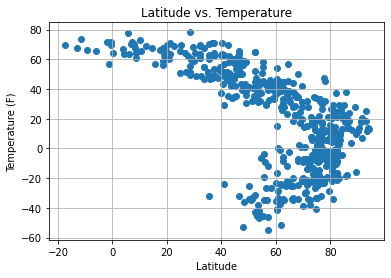

In [52]:
plt.scatter(weather_df["Temp"], weather_df["Lat"], marker = "o")

plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsTemp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

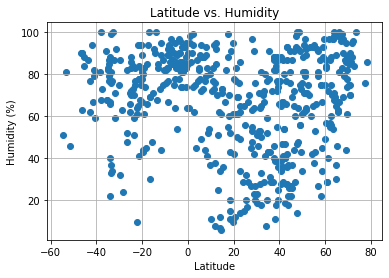

In [53]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker = "o")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsHumid.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

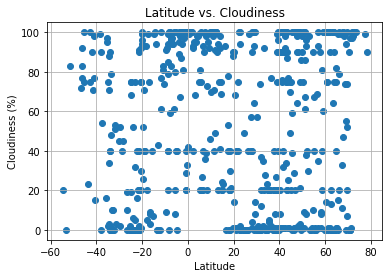

In [54]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker = "o")

plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsCloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

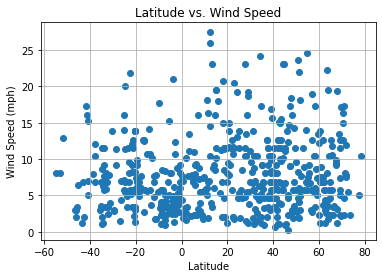

In [55]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker = "o")

plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatitudevsWind.png")

# Show plot
plt.show()

## Linear Regression

In [56]:
#filter the northern and southern hemisphere
northern_hemi = weather_df["Lat"]>= 0
northern_df = weather_df[northern_hemi]
southern_hemi = weather_df["Lat"] < 0
southern_df = weather_df[southern_hemi]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8411826179251076


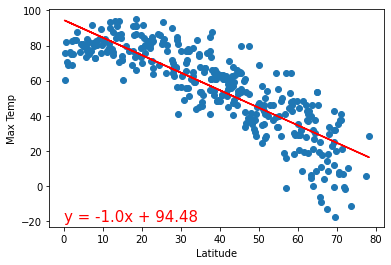

In [65]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Max Temp"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Max Temp"], marker = "o")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq,(0,-20),fontsize=15,color="red")

# Save the figure
plt.savefig("MaxTempvsLatLRnorth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5819248097069671


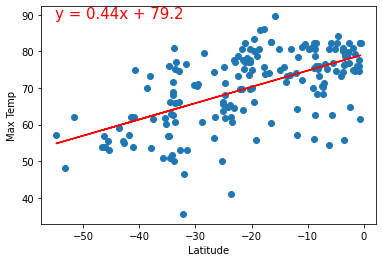

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Max Temp"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Max Temp"], marker = "o")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,89),fontsize=15,color="red")

# Save the figure
plt.savefig("MaxTempvsLatLRsouth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.14825671326855086


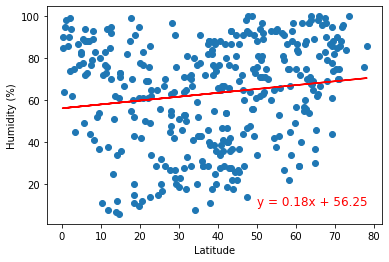

In [77]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Humidity"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Humidity"], marker = "o")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(50,10),fontsize=12,color="red")

# Save the figure
plt.savefig("MaxTempvsHumidLRnorth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2574430940707371


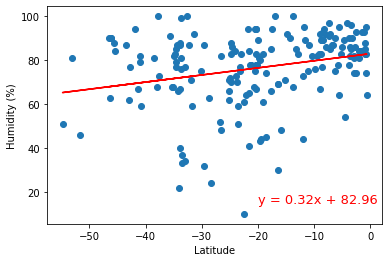

In [82]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Humidity"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Humidity"], marker = "o")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-20,15),fontsize=13,color="red")

# Save the figure
plt.savefig("MaxTempvsHumidLRsouth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.06358536272439992


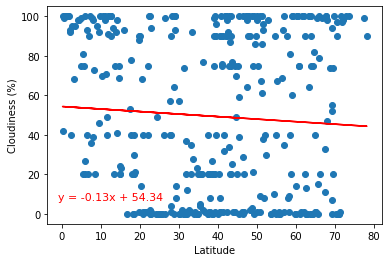

In [87]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Cloudiness"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Cloudiness"], marker = "o")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-1,7),fontsize=11,color="red")

# Save the figure
plt.savefig("MaxTempvsCloudLRnorth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.25181318740260306


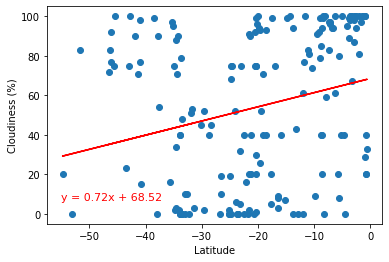

In [90]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Cloudiness"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Cloudiness"], marker = "o")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,7),fontsize=11,color="red")

# Save the figure
plt.savefig("MaxTempvsCloudLRsouth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.01986961767247088


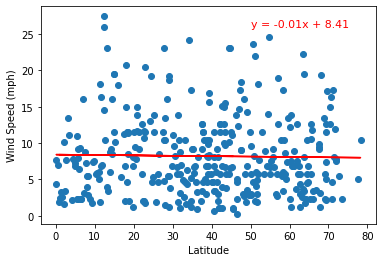

In [92]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_df["Lat"], northern_df["Wind Speed"])
regress_values = northern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern_df["Lat"], northern_df["Wind Speed"], marker = "o")
plt.plot(northern_df["Lat"],regress_values,"r-")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(50,26),fontsize=11,color="red")

# Save the figure
plt.savefig("MaxTempvsWindLRnorth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13059099578365935


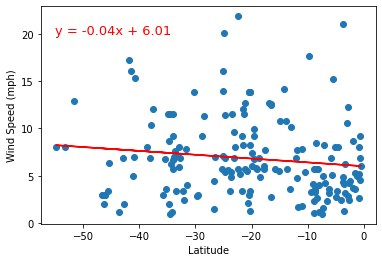

In [97]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_df["Lat"], southern_df["Wind Speed"])
regress_values = southern_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southern_df["Lat"], southern_df["Wind Speed"], marker = "o")
plt.plot(southern_df["Lat"],regress_values,"r-")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,20),fontsize=13,color="red")

# Save the figure
plt.savefig("MaxTempvsWindLRsouth.png")
#print r-value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

## Analysis 
### We can assume as you go further north, the lower the max temperature is.
### We can back this data up because this has a strong negative correlation with a r-value of -0.84
### We can also somewhat assume as you go further south, the lower the max temperate is as well
### This can also be backed up by our r-value of 0.58. This correlation is not as strong, so there is some chance for variance
### Wind speed and latitude for the northern hemisphere do not seem to be related. 
### 